# Bird count

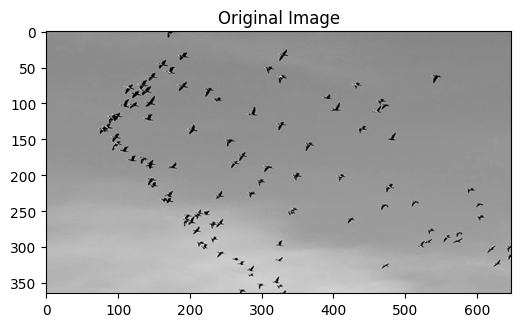

In [1]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np

src= cv2.imread("bird_test.jpg",0)

plt.figure(figsize=(6,5))
plt.imshow(src, cmap = 'gray')
plt.title('Original Image')
plt.show()

# Blurring

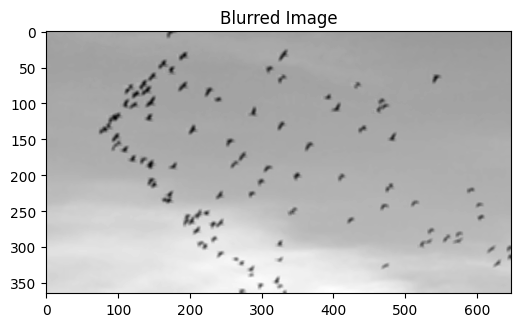

In [2]:
mask_size = 5
mask = np.ones((mask_size,mask_size),np.float32)/(mask_size**2)
image_blurred = cv2.filter2D(src,-1,mask)

plt.figure(figsize=(6,5))
plt.imshow(image_blurred, cmap = 'gray')
plt.title('Blurred Image')
plt.show()

# Thresholding

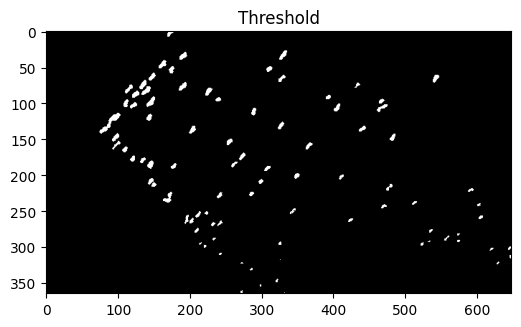

In [3]:
image_blurred = cv2.filter2D(src,-1,mask)
ret, image_thresh = cv2.threshold(image_blurred, 100, 255, cv2.THRESH_BINARY_INV) # 배경 검정, 대상 흰색

plt.figure(figsize=(6,5))
plt.imshow(image_thresh, cmap = 'gray')
plt.title('Threshold')
plt.show()

# open

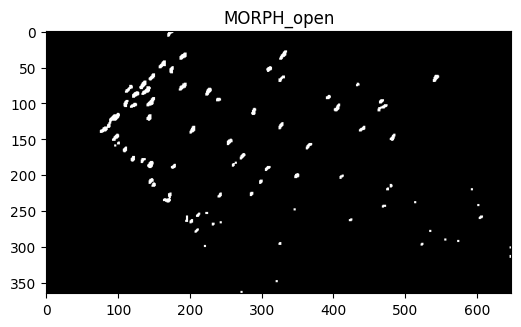

In [4]:
mask_size = 3
mask = np.ones((mask_size,mask_size))
image_open = cv2.morphologyEx(image_thresh, cv2.MORPH_OPEN, mask , iterations= 1)

plt.figure(figsize=(6,5))
plt.imshow(image_open, cmap = 'gray')
plt.title('MORPH_open')
plt.show()

In [5]:
dst = image_open
import numpy as np

def count_objects(image, background_color):
    H, W = image.shape[:2]
    counted = np.zeros_like(image)
    cnt = 0
    stack = []

    def is_background(pixel):
        return pixel == background_color

    def is_out_of_bound(h, w):
        return h < 0 or h >= H or w < 0 or w >= W

    for h in range(H):
        for w in range(W):
            pixel = image[h, w]
            if is_background(pixel):
                continue
            if counted[h, w] > 0:
                continue
            
            stack.append((h, w))
            while stack:
                curr_h, curr_w = stack.pop()
                if counted[curr_h, curr_w] > 0:
                    continue
                counted[curr_h, curr_w] = 1
                neighbors = [(curr_h + dh, curr_w + dw) for dh in range(-1, 2) for dw in range(-1, 2)]
                for nh, nw in neighbors:
                    if is_out_of_bound(nh, nw):
                        continue
                    if counted[nh, nw] > 0:
                        continue
                    if is_background(image[nh, nw]):
                        continue
                    stack.append((nh, nw))
            cnt += 1
    
    print("Number of objects:", cnt)
    print("Counted matrix:")
    print(counted)


In [6]:
background_color = 0  # 배경이 0일때 검정일때
count_objects(image_open, background_color)

Number of objects: 78
Counted matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [7]:
def cnt_obj(image):
    H, W = image.shape[:2]
    counted = np.zeros_like(image)
    cnt = 0
    pixels_to_check = []

    for h in range(H):
        for w in range(W):
            pixel = image[h, w]
            if pixel == 255:  # 픽셀이 obj이면
                if counted[h, w] > 0:
                    continue
                else:
                    pixels_to_check.append([h, w])
                    while pixels_to_check:
                        obj_h, obj_w = pixels_to_check.pop(0)
                        
                        if counted[obj_h, obj_w] > 0:
                            continue
                        counted[obj_h, obj_w] = 1
                        for i in range(-1, 2):
                            for j in range(-1, 2):
                                try:
                                    neighbor_pixel = image[obj_h + i, obj_w + j]
                                except IndexError:
                                    continue
                                if counted[obj_h + i, obj_w + j] > 0:
                                    continue
                                if neighbor_pixel == 0:
                                    continue
                                pixels_to_check.append([obj_h + i, obj_w + j])
                    cnt += 1

    print("Number of objects:", cnt)
    print("Counted matrix:")
    print(counted)


In [8]:
cnt_obj(image_open)

Number of objects: 78
Counted matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
